In [379]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import math
from scipy import interpolate, stats
import joblib

In [383]:
df = pd.read_csv("../joined_combined_filtered_mined_soil_water_df_td_17_4.csv")

/home/draget/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,19,23,39,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [442]:
fdf = df[(df["pool"] != True) & (df["secondfloor"] < 1) & (df["mhome"] < 1)  & (df["pers_prop_val"] < 1) & (df["parval"] < 1000000) & (df["parval"] > 10000) & (df["lot_area"] < 500)].copy()
fdf["add_g_size"] = fdf["addsize"] + fdf["gize"]
feature_df = fdf[["lot_area", "TotalWater", "water_dist", "castorieindex", "firstfloor", "city_dist", "parval"]]
feature_df.shape

(15426, 7)

In [452]:
feature_df = feature_df.dropna()
n = (feature_df.shape[1] - 1)
X = feature_df[feature_df.columns[0:n]].values
y = feature_df[feature_df.columns[n]].values
feature_df.shape

(14439, 7)

In [444]:
n_split = int(0.85*len(X))
X,y = shuffle(X,y)
X_train = X[0:n_split]
y_train = y[0:n_split]
X_test = X[n_split:]
y_test = y[n_split:]

In [445]:
regr = RandomForestRegressor(n_estimators = 100, min_samples_split = 50, min_samples_leaf = 20)

In [446]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [447]:
regr.score(X_test, y_test)

0.5316379087040564

In [448]:
regr.feature_importances_

array([0.59837897, 0.09302078, 0.03102977, 0.01799465, 0.1623248 ,
       0.09725102])

In [449]:
y_pred = regr.predict(X_test)

In [402]:
test = [regr.predict([[6000,w,11,70,0,0,30]])[0] for w in np.linspace(2.5,5.5,20)]

In [352]:
test = [regr.predict([[a,5,11,60,0,20]])[0] for a in np.linspace(3,100,20)]

In [372]:
test = [regr.predict([[100,4.5,x,60,0,30]])[0] for x in np.linspace(3,40,20)]

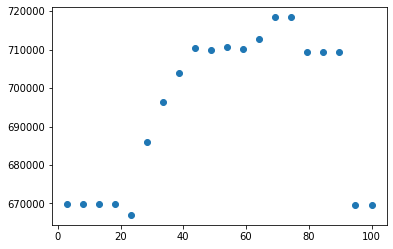

In [403]:
plt.scatter(np.linspace(3,100,20), test)

In [408]:
regr.predict([[2000,4,11,70,800,0,30]])

array([708641.31980716])

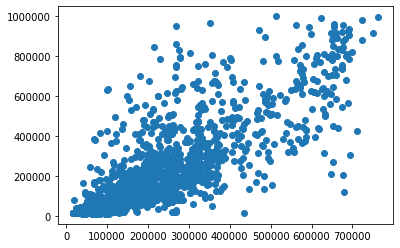

In [374]:
plt.scatter(y_pred, y_test)

In [450]:
math.sqrt(mean_squared_error(y_test, y_pred))

140028.72032225865

In [377]:
feature_df.to_csv("fdf.csv")

In [451]:
joblib.dump(regr, 'regr.pkl') 


['regr.pkl']

In [416]:
df["lot_area"].value_counts(bins = 100, sort = False)

(-9.953999999999999, 99.533]    20049
(99.533, 199.067]                1693
(199.067, 298.6]                  308
(298.6, 398.133]                  374
(398.133, 497.666]                 90
                                ...  
(9455.664, 9555.197]                0
(9555.197, 9654.73]                 0
(9654.73, 9754.263]                 0
(9754.263, 9853.797]                0
(9853.797, 9953.33]                 1
Name: lot_area, Length: 100, dtype: int64